In [1]:
%matplotlib notebook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
dc_data_df= pd.read_csv('Project_1/dc-wikia-data_csv.csv')

In [4]:
marvel_data_df = pd.read_csv('Project_1/marvel-wikia-data_csv.csv')

In [5]:
combined_hero_data = pd.merge(dc_data_df, marvel_data_df, how="outer")

In [6]:
combined_hero_data

,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first appearance,year
0,1422,batman (bruce wayne),\/wiki\/batman_(bruce_wayne),secret identity,good characters,blue eyes,black hair,male characters,straight,living characters,3093.0,"1939, may",1939.0
1,23387,superman (clark kent),\/wiki\/superman_(clark_kent),secret identity,good characters,blue eyes,black hair,male characters,straight,living characters,2496.0,"1986, october",1986.0
2,1458,green lantern (hal jordan),\/wiki\/green_lantern_(hal_jordan),secret identity,good characters,brown eyes,brown hair,male characters,straight,living characters,1565.0,"1959, october",1959.0
3,1659,james gordon (new earth),\/wiki\/james_gordon_(new_earth),public identity,good characters,brown eyes,white hair,male characters,straight,living characters,1316.0,"1987, february",1987.0
4,1576,richard grayson (new earth),\/wiki\/richard_grayson_(new_earth),secret identity,good characters,blue eyes,black hair,male characters,straight,living characters,1237.0,"1940, april",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23267,657508,ru'ach (earth-616),\/ru%27ach_(earth-616),no dual identity,bad characters,green eyes,no hair,male characters,NaN,living characters,NaN,NaN,NaN
23268,665474,thane (thanos' son) (earth-616),\/thane_(thanos%27_son)_(earth-616),no dual identity,good characters,blue eyes,bald,male characters,NaN,living characters,NaN,NaN,NaN
23269,695217,tinkerer (skrull) (earth-616),\/tinkerer_(skrull)_(earth-616),secret identity,bad characters,black eyes,bald,male characters,NaN,living characters,NaN,NaN,NaN
23270,708811,tk421 (spiderling) (earth-616),\/tk421_(spiderling)_(earth-616),secret identity,neutral characters,NaN,NaN,male characters,NaN,living characters,NaN,NaN,NaN


In [7]:
#How many characters in DC universe?
len(dc_data_df)

6896

In [8]:
#How many characters in Marvel universe?
len(marvel_data_df)

16376

In [9]:
#How many characters in each universe?
len(combined_hero_data)

23272

In [11]:
#Gender in DC Universe
dc_gender_df = pd.read_csv('Project_1/dc-wikia-data_csv.csv')
dc_gender = dc_gender_df['sex']

In [12]:
dc_gender

0         male characters
1         male characters
2         male characters
3         male characters
4         male characters
              ...        
6891    female characters
6892      male characters
6893      male characters
6894      male characters
6895      male characters
Name: sex, Length: 6896, dtype: object

In [16]:
#Count the number of male, female, genderless, and transgender characters in DC Universe
dc_gender_count = dc_gender_df.groupby('sex')

dc_genders = dc_gender_count['sex'].count()

dc_genders

sex
female characters         1967
genderless characters       20
male characters           4783
transgender characters       1
Name: sex, dtype: int64

Text(0.5, 1.0, 'Genders Count in the DC Universe')

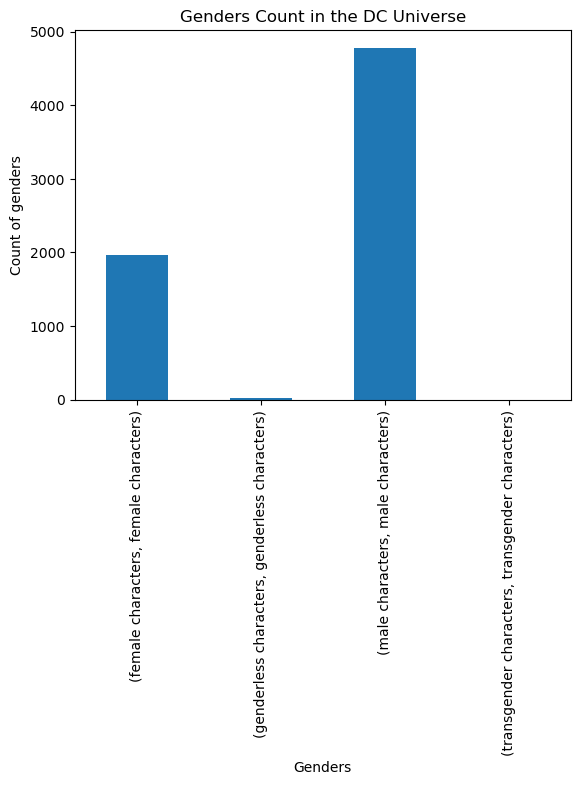

In [17]:
dc_gender_count = dc_gender_count['sex'].value_counts()

bar_plot = dc_gender_count.plot.bar(color='tab:blue') 

plt.xlabel("Genders")
plt.ylabel("Count of genders")


plt.title("Genders Count in the DC Universe")

In [18]:
marvel_gender_df = pd.read_csv('Project_1/marvel-wikia-data_csv.csv')
marvel_gender = marvel_gender_df['sex']

In [19]:
marvel_gender

0        male characters
1        male characters
2        male characters
3        male characters
4        male characters
              ...       
16371    male characters
16372    male characters
16373    male characters
16374    male characters
16375                NaN
Name: sex, Length: 16376, dtype: object

In [20]:
marvel_gender_count = marvel_gender_df.groupby('sex')

marvel_genders = marvel_gender_count['sex'].count()

marvel_genders

sex
agender characters           45
female characters          3837
genderfluid characters        2
male characters           11638
Name: sex, dtype: int64

In [21]:
marvel_gender_df['sex'].value_counts()

male characters           11638
female characters          3837
agender characters           45
genderfluid characters        2
Name: sex, dtype: int64

In [22]:
marvel_gender_count

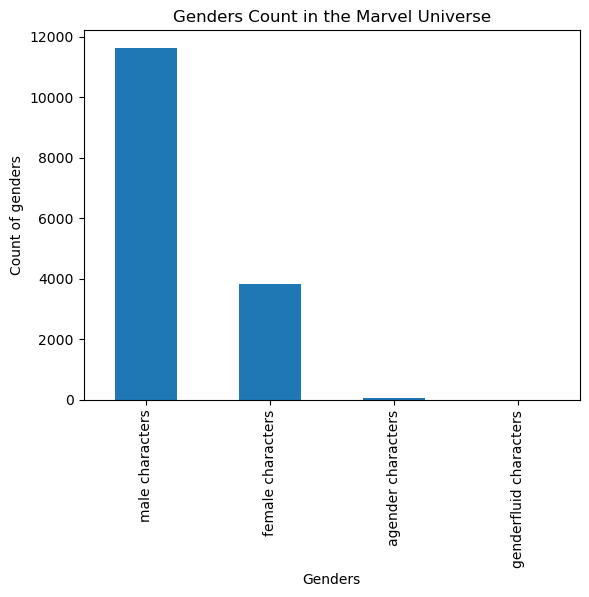

In [23]:
marvel_gender_count = marvel_gender_df['sex'].value_counts()


plt.xlabel("Genders")
plt.ylabel("Count of genders")

plt.title("Genders Count in the Marvel Universe")

bar_plot = marvel_gender_count.plot.bar()

<AxesSubplot:>

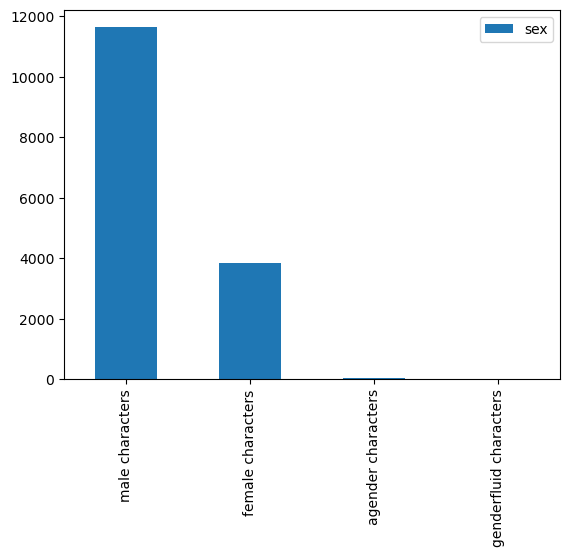

In [24]:
marvel_gender_count.to_frame().plot.bar()

In [49]:
# Character wealth CSV
character_wealth_df = pd.read_csv("Project_1/character_wealth.csv")
character_wealth_df

,Name,Alter_ego,Franchise,Type,Net_worth,Income_source,Entity_name,Entity_type
0,Aquaman,Arthur Curry,DC,Hero,"$150,000,000,000,000",Monarch,Atlantis,Kingdom
1,Black Panther,T'Challa,Marvel,Hero,"$90,700,000,000,000",Monarch,Kingdom of Wakanda,Kingdom
2,Namor,Namor McKenzie,Marvel,Hero,"$260,000,000,000",Entrepreneur,Atlantis,Kingdom
3,Sunspot,Roberto da Costa,Marvel,Villain,"$125,000,000,000",Inheritance,NaN,NaN
4,Iron Man,Tony Stark,Marvel,Hero,"$100,000,000,000",Entrepreneur,Stark Industries,Multinational Conglomerate
5,Batman,Bruce Wayne,DC,Hero,"$80,000,000,000",Inheritance,Wayne Enterprises,Multinational Conglomerate
6,Lex Luthor,Alexander Luthor,DC,Villain,"$75,000,000,000",Entrepreneur,LexCorp,Multinational Conglomerate
7,Doctor Doom,Victor von Doom,Marvel,Villain,"$35,000,000,000",Monarch,Latveria,Kingdom
8,Kingpin,Wilson Fisk,Marvel,Villain,"$30,000,000,000",Entrepreneur,NaN,NaN
9,Black Adam,Theo Ramses Djoser Teth-Adam,DC,Villain,"$12,000,000,000",Monarch,Khandaq,Kingdom


In [79]:
hero_options = ["Type", "Hero"]
richest_hero = character_wealth_df[character_wealth_df["Type"].isin(hero_options)]
richest_hero

,Name,Alter_ego,Franchise,Type,Net_worth,Income_source,Entity_name,Entity_type,Hero,Villain
0,Aquaman,Arthur Curry,DC,Hero,"$150,000,000,000,000",Monarch,Atlantis,Kingdom,Hero,Hero
1,Black Panther,T'Challa,Marvel,Hero,"$90,700,000,000,000",Monarch,Kingdom of Wakanda,Kingdom,Hero,Hero
2,Namor,Namor McKenzie,Marvel,Hero,"$260,000,000,000",Entrepreneur,Atlantis,Kingdom,Hero,Hero
4,Iron Man,Tony Stark,Marvel,Hero,"$100,000,000,000",Entrepreneur,Stark Industries,Multinational Conglomerate,Hero,Hero
5,Batman,Bruce Wayne,DC,Hero,"$80,000,000,000",Inheritance,Wayne Enterprises,Multinational Conglomerate,Hero,Hero
11,Green Arrow,Oliver Queen,DC,Hero,"$7,000,000,000",Inheritance,Queen Consolidated,Multinational Conglomerate,Hero,Hero
13,Iron Fist,Daniel Rand,Marvel,Hero,"$5,000,000,000",Inheritance,Rand Enterprises,Multinational Conglomerate,Hero,Hero
14,Archangel,Warren Worthington III,Marvel,Hero,"$5,000,000,000",Inheritance,Worthington Industries,Multinational Conglomerate,Hero,Hero
15,Blue Beetle,Ted Kord,DC,Hero,"$5,000,000,000",Inheritance,Kord Enterprises,Multinational Conglomerate,Hero,Hero
17,Mister Fantastic,Reed Richards,Marvel,Hero,"$5,000,000,000",Entrepreneur,Fantastic Four Inc,NaN,Hero,Hero
